In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/devendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
train_data = pd.read_csv('train.tsv',sep='\t')
test_data = pd.read_csv('test.tsv',sep='\t')


In [10]:
Sentiment_words=[]
for row in train_data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('neutral')
    elif row == 2:
        Sentiment_words.append('somewhat negative')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train_data['Sentiment_words'] = Sentiment_words

In [98]:
word_count=pd.value_counts(train_data['Sentiment_words'].values, sort=False)

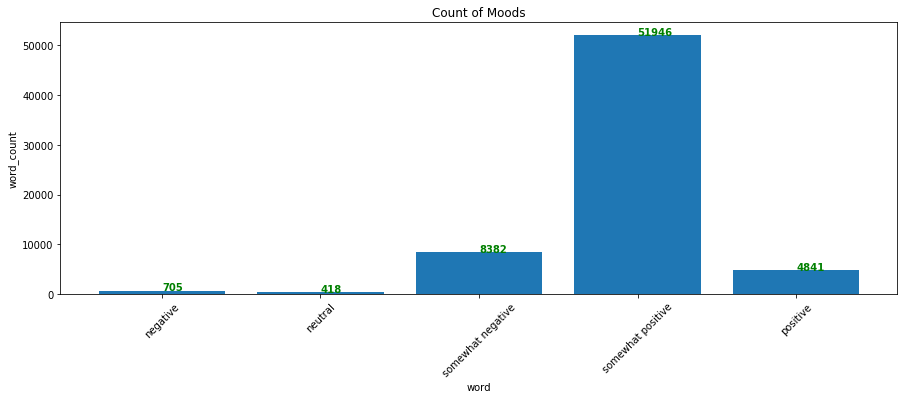

In [97]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','neutral','somewhat negative','somewhat positive','positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

In [14]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

In [16]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /home/devendra/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [17]:
corpus= []
for i in range(0, 156060):
    corpus.append(review_to_words(train_data['Phrase'][i]))


In [19]:
corpus


['series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story',
 'series escapade demonstrating adage good goose',
 'series',
 '',
 'series',
 'escapade demonstrating adage good goose',
 '',
 'escapade demonstrating adage good goose',
 'escapade',
 'demonstrating adage good goose',
 'demonstrating adage',
 'demonstrating',
 'adage',
 '',
 'adage',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 '',
 'good goose',
 'good',
 'goose',
 '',
 'goose',
 'goose',
 'also good gander occasionally amuses none amount much story',
 'also good gander occasionally amuses none amount much story',
 'also',
 'also',
 'good gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander occasionally amuses none amount much story',
 'gander',
 'gander',
 'gander',
 '',
 'occasionally amuses none amount much story',
 '',
 '',
 '',
 '',
 'occasionally amuses none amount much story',
 'occasionally',
 '

In [12]:
train_data.head()


,PhraseId,SentenceId,Phrase,Sentiment,Sentiment_words
0,1,1,A series of escapades demonstrating the adage ...,1,neutral
1,2,1,A series of escapades demonstrating the adage ...,2,somewhat negative
2,3,1,A series,2,somewhat negative
3,4,1,A,2,somewhat negative
4,5,1,series,2,somewhat negative


In [22]:
corpus1= []
for i in range(0, 66292):
    corpus1.append(review_to_words(test_data['Phrase'][i]))


In [23]:
train_data['new_Phrase']=corpus


In [24]:
train_data.drop(['Phrase'],axis=1,inplace=True)

In [25]:
positive=train_data[train_data['Sentiment_words']==('positive')]

In [26]:
positive

,PhraseId,SentenceId,Sentiment,Sentiment_words,new_Phrase
63,64,2,4,positive,quiet introspective entertaining independent w...
66,67,2,4,positive,quiet introspective entertaining independent
74,75,2,4,positive,entertaining
77,78,2,4,positive,worth seeking
117,118,4,4,positive,positively thrilling combination ethnography i...
118,119,4,4,positive,positively thrilling combination ethnography i...
123,124,4,4,positive,thrilling
166,167,6,4,positive,comedy drama nearly epic proportion rooted sin...
172,173,6,4,positive,nearly epic
176,177,6,4,positive,rooted sincere performance title character und...


In [27]:
words = ' '.join(positive['new_Phrase'])
split_word = " ".join([word for word in words.split()])


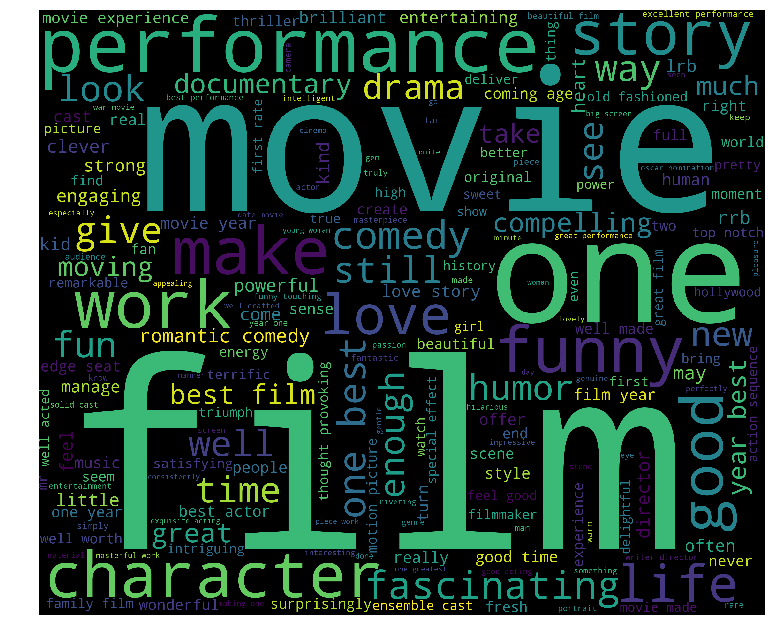

In [34]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [35]:
pos=positive['new_Phrase']

In [37]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)

In [38]:
pos_words = vectorizer.fit_transform(pos)
pos_words = pos_words.toarray()
pos= vectorizer.get_feature_names()

In [51]:
dist = np.sum(pos_words, axis=0)
for tag, count in zip(pos, dist):
    print (tag,count)

ability 20
able 32
absolute 9
absolutely 24
absorbing 18
accept 10
accessible 16
acclaim 9
accomplish 5
accomplished 23
accomplishes 7
accomplishment 17
accurate 9
achievement 30
achieves 5
achingly 7
across 12
act 29
acted 43
acting 101
action 93
actor 130
actress 14
actually 45
acute 8
adam 7
adaptation 22
add 17
addition 13
admirable 16
admire 7
adorably 7
adorns 7
adrenalin 6
adrenaline 6
adult 35
adventure 54
adventurous 17
aerial 7
affecting 9
affection 11
affirming 10
affirms 5
age 84
agenda 7
aggrandizing 7
ago 9
ahead 10
aimed 5
air 10
alike 5
alive 20
allegory 7
allen 15
allows 19
alluring 7
almost 50
alone 8
along 29
also 88
alternately 6
always 43
amazing 35
amazingly 11
ambiguity 6
ambitious 18
america 18
american 63
among 19
amount 16
amused 9
amusing 57
anchor 6
anderson 6
angst 10
animal 10
animated 28
animation 24
anime 6
another 43
answer 11
antic 7
anybody 5
anyone 35
anything 31
apart 8
apex 5
aplomb 11
apocalypse 8
apparent 6
appeal 15
appealing 27
appear 8
appreci

sexual 11
sexy 27
shape 12
shaped 11
share 12
sharp 18
sheer 15
sheerly 6
shifting 9
shimmering 9
shine 13
shining 9
shiver 6
shock 8
shocking 6
short 25
shot 51
show 47
showtime 6
shyamalan 6
sick 11
side 26
sight 12
sign 9
significance 7
significant 9
significantly 6
silly 17
silver 6
simple 35
simply 35
simultaneously 17
since 50
sincere 17
sincerity 6
singer 7
singing 18
single 7
situation 14
skilfully 6
skill 32
skillful 9
skillfully 10
skin 10
sleepless 6
slice 11
slightly 6
slowly 6
small 29
smart 106
smarter 6
smartly 19
smile 22
sneak 9
soap 6
soar 18
sobering 9
social 14
soderbergh 9
solid 106
solidly 15
somber 6
somehow 8
someone 6
something 90
sometimes 39
somewhat 8
son 13
song 10
soon 7
sophisticated 20
sort 15
soul 27
sound 16
soundtrack 12
space 19
spader 7
spare 13
sparkling 16
special 44
spectacle 9
spectacular 19
spectacularly 12
spell 10
spellbinding 9
spider 15
spielberg 26
spike 9
spin 12
spirit 64
spirited 15
spiritual 16
spirituality 6
splendid 36
splendor 9
spo

In [53]:
postive_new= pd.DataFrame(dist)

In [55]:
postive_new.columns=['word_count']

In [56]:
postive_new['word'] = pd.Series(pos, index=postive_new.index)

In [58]:
postive_new1=postive_new[['word','word_count']]

In [59]:
postive_new1.head()

,word,word_count
0,ability,20
1,able,32
2,absolute,9
3,absolutely,24
4,absorbing,18


In [60]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])

In [61]:
top_30_words.head(30)

,word,word_count
652,film,1104
1149,movie,757
1223,one,517
1280,performance,472
161,best,394
715,funny,347
760,good,339
1933,well,317
1672,story,280
1990,year,275


In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:, 2].values

In [73]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.40, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)


/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
test_data['Sentiment'] = y_real_pred

In [92]:
Sentiment_words=[]
for row in test_data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('neutral')
    elif row == 2:
        Sentiment_words.append('somewhat negative')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
test_data['Sentiment_words'] = Sentiment_words

In [95]:
test_data.to_csv('result.csv', sep='\t')

In [86]:
mse = ((y_pred - y_test) ** 2).mean()

In [87]:
rmse = sqrt(mse)

In [89]:
rmse

0.8045987901576522